## Clustering items

Se dispone de un fichero csv llamado "item_features" en el cual se encuentra información de los ítems disponibles para compra en la web de H & M. En este fichero se tiene una fila por categoria de cada ítem. Una categoria puede ser un atributo cualquiera, el tipo de manga de una camiseta, si un pantalón es largo o corto, o el color de una sudadera. También se indica el valor de la categoria, que es el valor del atributo al que hace referencia la categoria. Por ejemplo, si la categoria es el color de la camiseta, el valor puede ser rojo. No tenemos forma de entender que es que, ya que se referencia ítem, categoria y valor por id. Para poder obtener información valiosa de los ítems en el posterior entrenamiento del modelo, vamos a tener que identificar que tipo de ítem es, para así poder agrupar los ítems por clusters. Esto se puede hacer mediante un proceso de aprendizaje no supervisado llamado clustering. Vamos a tratar de conseguir identificar que clusters existen y que ítems se encuentran en cada uno de ellos, solo a partir de los datos presentes en el fichero mencionado.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#purchases = pd.read_csv('/content/drive/MyDrive/Joan/train_purchases.csv')
#sessions = pd.read_csv('/content/drive/MyDrive/Joan/train_sessions.csv')
#features = pd.read_csv('/content/drive/MyDrive/Joan/item_features.csv')

purchases = pd.read_csv('train_purchases.csv')
sessions = pd.read_csv('train_sessions.csv')
features = pd.read_csv('item_features.csv')

In [4]:
features_ones = features.copy()
features_ones["feature_value_id"]=1
features_ones = features_ones.dropna()
features_ones = features_ones.pivot_table(values='feature_value_id', index='item_id', columns='feature_category_id', aggfunc='first')
features_ones = features_ones.replace(np.nan, 0)
features_matrix = features.pivot_table(values='feature_value_id', index='item_id', columns='feature_category_id', aggfunc='first')

features_ones.head(10)

feature_category_id,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
item_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
9,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
13,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
features_scaled=ss.fit_transform(features_ones)
features_scaled= pd.DataFrame(features_scaled)
features_scaled.head(20)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-0.203153,-0.324182,-0.804672,-1.26175,-0.817330,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,-0.927842,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,-1.135140
1,-0.203153,-0.324182,1.242743,0.79255,1.223496,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,1.077770,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,0.880948
2,-0.203153,-0.324182,1.242743,0.79255,1.223496,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,1.077770,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,0.880948
3,-0.203153,-0.324182,-0.804672,-1.26175,-0.817330,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,-0.927842,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,-1.135140
4,-0.203153,-0.324182,1.242743,0.79255,1.223496,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,1.077770,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,0.880948
5,-0.203153,-0.324182,1.242743,0.79255,1.223496,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,1.077770,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,0.880948
6,-0.203153,-0.324182,-0.804672,-1.26175,-0.817330,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,-0.927842,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,-1.135140
7,-0.203153,-0.324182,-0.804672,-1.26175,-0.817330,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,-0.927842,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,-1.135140
8,-0.203153,-0.324182,-0.804672,0.79255,-0.817330,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,-0.927842,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,0.880948
9,-0.203153,-0.324182,-0.804672,-1.26175,1.223496,-0.286060,0.400516,3.327901,-0.076265,-0.226388,...,-0.17073,-0.927842,-0.196065,-0.348674,0.168358,0.398101,5.325118,-0.17073,0.394607,-1.135140


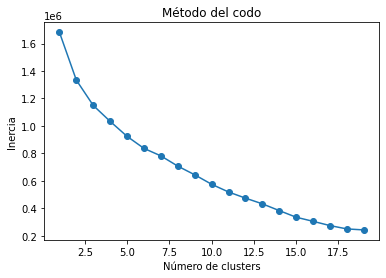

In [6]:
# Uso del metodo del codo para encontrar el número óptimo de clusters 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    km=kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1,20),wcss, marker="o")

plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.show()

In [8]:
features_series=pd.Series(features_scaled.index)

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


def silhouette_analysis(df, cluster_labels,n,clustering_type,heading):
    
    plt.figure(figsize=(15,10))
    ax= plt.subplot()
    ax.set_ylim([0, len(df) + (n + 1) * 50])
    dictofhobbies={i:cluster_labels[i] for i in range(0,len(cluster_labels))}
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    if clustering_type == 'Kmeans':
        metrics='euclidean'
    if clustering_type == 'Agglomerative':
        metrics='euclidean'
    if clustering_type == 'GaussianMixture':
        metrics='mahalanobis'
    silhouette_avg = silhouette_score(df, cluster_labels,metric=metrics)
    
    print("For n_clusters =", n,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    
   
    yticks=[]
    ylabels=[]
    y_lower = 10
    for i in range(n):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        silhouette_labels=[hobby for hobby,cluster_label in dictofhobbies.items() if cluster_label==i ]
        zipped_values=dict(zip(silhouette_labels,ith_cluster_silhouette_values))      
        #sorted(zipped_values,key=lambda x:x1])
        new_zipped_values=sorted(zipped_values.items(), key=lambda x: x[1])
        ith_cluster_silhouette_values.sort()
        #print("ith_cluster_silhouette_values::",len(ith_cluster_silhouette_values))
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        #print("yupper is::",y_upper)
        color = cm.nipy_spectral(float(i) / n)
        pos=np.arange(y_lower, y_upper)
       
        ax.barh(pos,ith_cluster_silhouette_values,height=1.0,color=color, edgecolor="none")
               
        yticks.extend(pos)
        ylabels.extend(labels[0] for labels in new_zipped_values)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
       
        # Compute the new y_lower for next plot
        y_lower = y_upper + 50  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Clusters")
    
    
    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    hobbies_labels=[]
    for y in ylabels:
        hobbies_labels.append(features_series[y])
    
    #ax.set_yticks(yticks)
    #ax.set_yticklabels(hobbies_labels, fontSize=8)  
    ax.set_xticks([-0.1, 0,0.1, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for " ,heading, "with n_clusters = %d" % n),
                 fontsize=14, fontweight='bold')

plt.show()

for components = 2
[0.3505]
for components = 3
[0.4297]
for components = 4
[0.4988]
for components = 5
[0.5524]
for components = 6
[0.5996]
for components = 7
[0.6425]
for components = 8
[0.6817]
for components = 9
[0.7182]
for components = 10
[0.7526]
for components = 11
[0.7844]
for components = 12
[0.8129]
for components = 13
[0.8366]
for components = 14
[0.8598]
for components = 15
[0.8783]
for components = 16
[0.8935]
for components = 17
[0.908]
for components = 18
[0.9221]
for components = 19
[0.9353]


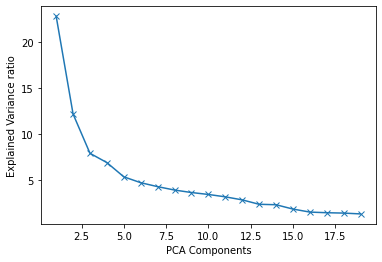

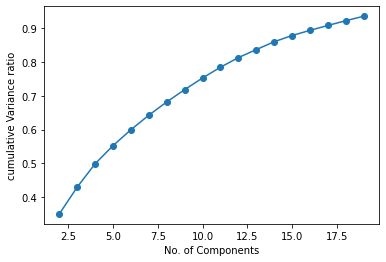

In [12]:
#Running PCA on the scaled data


from sklearn.decomposition import PCA
plt.figure()
cmr=[]
for n_com in range(2,20):
    
    cumulative_ratio=0
   
    pca= PCA(n_components=n_com)
    hobbies_reduced=pca.fit_transform(features_scaled)

    print("for components = %d" %n_com)
    components= pd.DataFrame(np.round(pca.components_, 4),columns=features_scaled.keys())
   
    ratios=pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    
    for i in range((variance_ratios.shape[0])):
        
        cumulative_ratio= cumulative_ratio + variance_ratios.values[i]
    
    cmr.append(cumulative_ratio)
    print(cumulative_ratio)
vr= variance_ratios.values
plt.plot(range(1,20),vr*100,marker="x")   
plt.xlabel("PCA Components")
plt.ylabel("Explained Variance ratio")
plt.figure()
plt.plot(range(2,20),cmr,marker="o")
plt.xlabel("No. of Components")
plt.ylabel("cumulative Variance ratio")
plt.show()


PCA for components=15
For n_clusters = 5 The average silhouette_score is : 0.3540651329078961


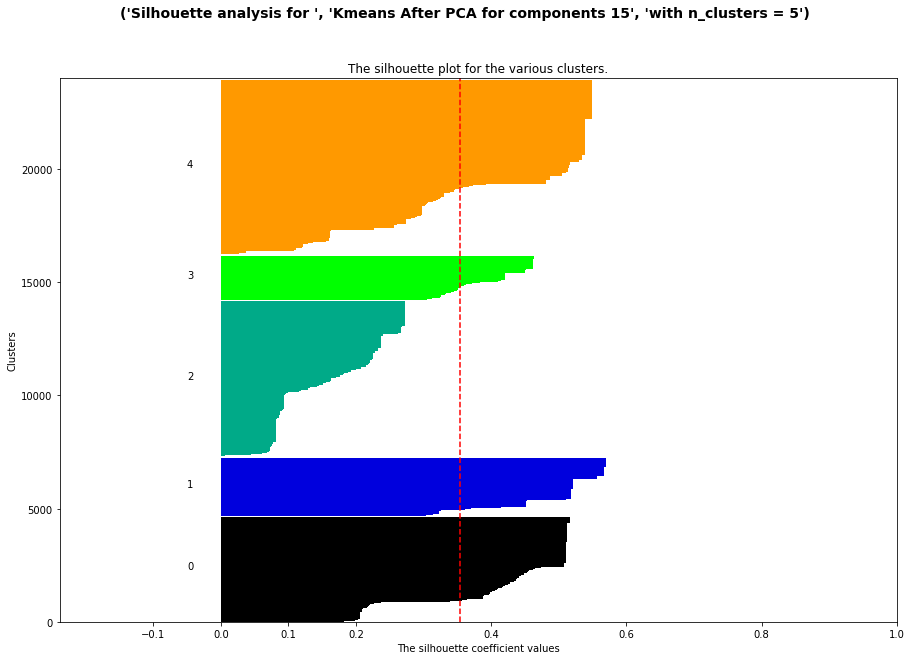

In [13]:
#running PCA with kmeans 
for n_comp in [15]:
    print("PCA for components=%d"%n_comp)
    pca_km=PCA(n_components=n_comp)
    df_reduced=pca_km.fit_transform(features_scaled)
    
    
    for n_clust in [5]:
        kmeans_red_pca=KMeans(n_clusters=n_clust)
        reduced_cluster_labels=kmeans_red_pca.fit_predict(df_reduced)
        centers_km=kmeans_red_pca.cluster_centers_
        silhouette_analysis(df_reduced,reduced_cluster_labels,n_clust,'Kmeans','Kmeans After PCA for components %d' %n_comp)

In [14]:
#visualizing the 5 clusters in 2 dimensions with 2 principal componenets
#reducing data to 2 prinicipal components
pca_2comp=PCA(n_components=2)
df_reduced_2comp=pca_2comp.fit_transform(features_scaled)

# running Kmeans for 5 clusters on 2 PC's
kmeans_pca_2comp=KMeans(n_clusters=5)
reduced_cluster_labels_2comp=kmeans_pca_2comp.fit_predict(df_reduced_2comp)
centers_2comp=kmeans_pca_2comp.cluster_centers_

#creating dataframes for cluster labels and 2 PC's
predictions=pd.DataFrame(reduced_cluster_labels_2comp,columns=['Cluster_pred'])
reduced_df_2comp=pd.DataFrame(np.round(df_reduced_2comp,4),columns=['Dimension 1','Dimension 2'])

# concatanete the above two dfs
to_plot=pd.concat([predictions,reduced_df_2comp], axis=1)

In [15]:
def visualize_clusters(to_plot,centers,n_clusters):
    
    plt.figure(figsize=(15,8))
    ax=plt.subplot()

    colors=['red','green','blue','orange','yellow','purple']
    for n_clusters in range(n_clusters):
        
        #colors = cm.nipy_spectral((to_plot['Cluster_pred']== n_clusters).astype(float) / n_clusters)
        #colors=['red','green','blue','orange','yellow','purple']
        
        ax.scatter(to_plot[to_plot['Cluster_pred']==n_clusters].iloc[:, 1],to_plot[to_plot['Cluster_pred']==n_clusters].iloc[:, 2],
                   marker='.', s=80, lw=0, alpha=0.7,
                    c=colors[n_clusters], edgecolor='black', label='Cluster %d'%n_clusters)

            
            # Draw white circles at cluster centers
        

        for i, c in enumerate(centers):
           
            ax.scatter(c[0], c[1], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')
            ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                            s=80, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")

    plt.legend()    
    plt.show()

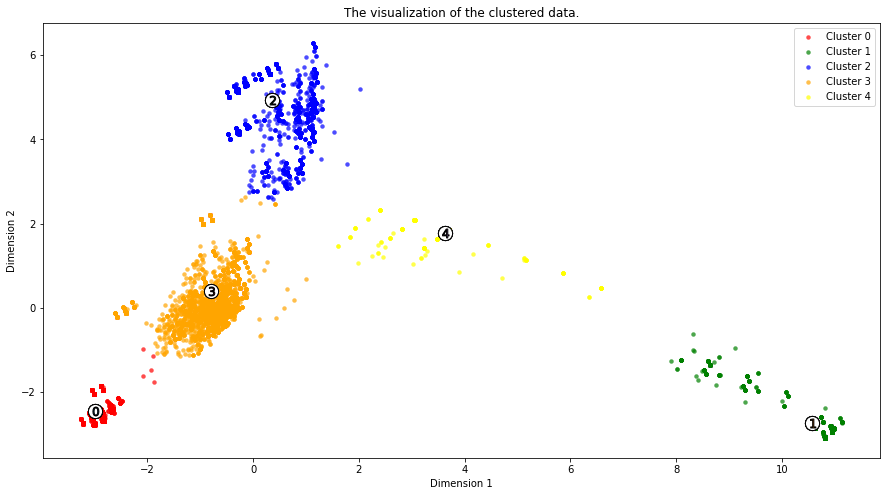

In [16]:
visualize_clusters(to_plot,centers_2comp,5)

In [17]:
print(to_plot)

       Cluster_pred  Dimension 1  Dimension 2
0                 2       1.1609       4.8802
1                 0      -3.0464      -2.6339
2                 0      -3.0480      -2.6523
3                 3      -0.5761       0.4368
4                 0      -3.0464      -2.6339
...             ...          ...          ...
23686             0      -2.8452      -1.9563
23687             1      10.6337      -2.8458
23688             0      -2.8263      -2.6251
23689             3      -0.4720       1.0820
23690             3      -0.8467      -0.6761

[23691 rows x 3 columns]


In [18]:
#reducing data to 16 prinicipal components
pca_comp=PCA(n_components=16)
df_reduced_comp=pca_comp.fit_transform(features_scaled)

# running Kmeans for 10 clusters on 16 PC's
kmeans_pca_comp=KMeans(n_clusters=10)
reduced_cluster_labels_comp=kmeans_pca_comp.fit_predict(df_reduced_comp)
centers_comp=kmeans_pca_comp.cluster_centers_

#creating dataframes for cluster labels and 16 PC's
predictions=pd.DataFrame(reduced_cluster_labels_comp,columns=['Cluster_pred'])
#reduced_df_comp=pd.DataFrame(np.round(df_reduced_comp,4),columns=['Dimension 1','Dimension 2'])

# concatanete the above two dfs
#to_plot=pd.concat([predictions,reduced_df_comp], axis=1)

In [19]:
print(predictions)

       Cluster_pred
0                 3
1                 4
2                 4
3                 2
4                 4
...             ...
23686             0
23687             1
23688             4
23689             2
23690             2

[23691 rows x 1 columns]


In [20]:
cluster_assign = predictions.loc[to_plot.index,'Cluster_pred']
cluster_assign= cluster_assign.to_frame()

cluster_assign["item_id2"]=np.unique(features[['item_id']].values).tolist()
#print(np.unique(features[['item_id']].values).tolist())
cluster_assign.head()
cluster_assign.to_csv('cluster_assign.csv')

In [21]:
# Lets recover the data reduced by PCA (also Standard scalar for scaled data)

#finding out the real centers of the data
#main_centers=ss.inverse_transform(pca_2comp.inverse_transform(centers_2comp))
real_centers= ss.inverse_transform(pca_km.inverse_transform(centers_km))

In [22]:
real_centers_df=pd.DataFrame(np.round(real_centers,3), columns = features_scaled.columns)

In [23]:
print(features_scaled.columns)

RangeIndex(start=0, stop=73, step=1)


In [24]:
dev_from_median=real_centers_df- features_ones.median()

In [25]:
dev_from_median

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,NaN,-0.001,0.613,0.668,-0.370,-0.001,0.998,-1.000,0.000,0.000,...,0.670,0.000,0.000,0.999,-0.001,-1.000,-0.000,0.999,-0.380,NaN
1,NaN,0.887,-0.004,-0.010,-1.004,0.001,0.002,-1.000,-0.000,0.000,...,-0.006,0.339,0.993,0.997,-0.999,-1.000,0.262,0.001,-0.563,NaN
2,NaN,-0.002,-0.023,0.672,-1.023,0.259,0.899,-0.997,0.000,0.002,...,0.459,0.001,0.002,0.907,-0.097,-0.999,0.001,0.910,-0.466,NaN
3,NaN,-0.001,0.618,0.670,-0.343,0.004,0.999,-0.008,-0.001,0.582,...,-0.027,0.000,0.000,1.001,-0.001,-0.590,-0.001,1.000,-0.389,NaN
4,NaN,-0.001,0.707,0.725,-0.291,0.001,0.999,-1.001,0.018,-0.001,...,0.623,-0.000,0.000,1.000,0.000,-1.000,-0.001,0.999,-0.416,NaN


In [26]:
print(len(real_centers_df.index))

5


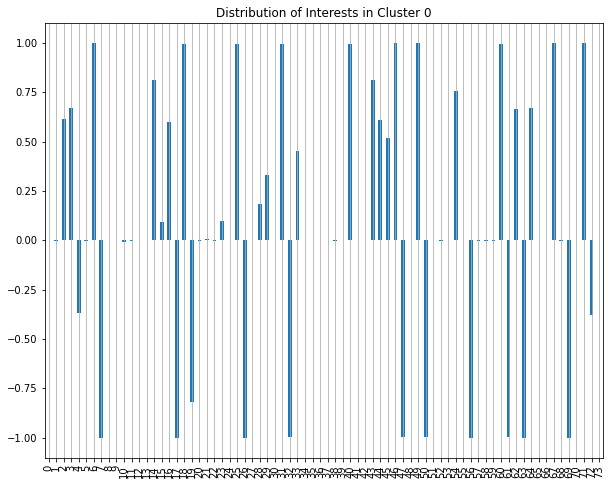

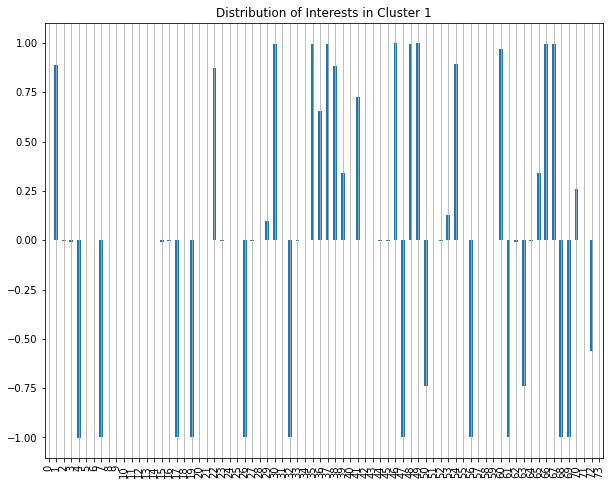

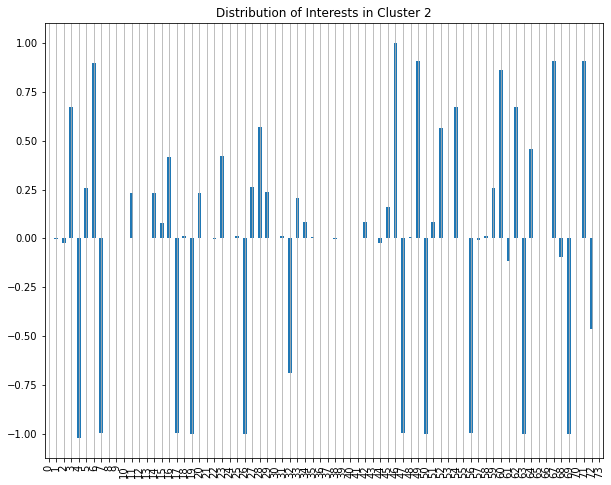

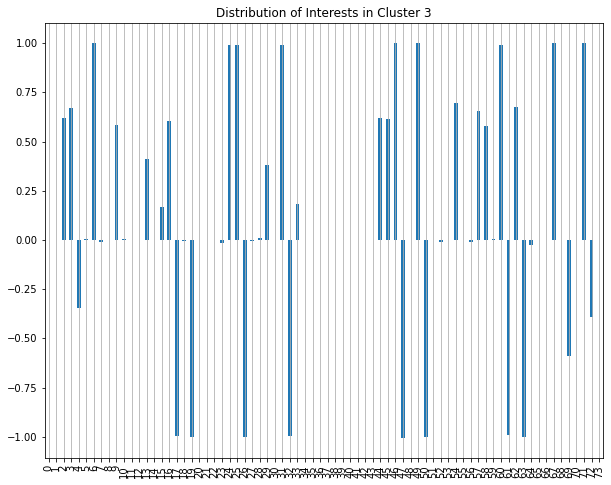

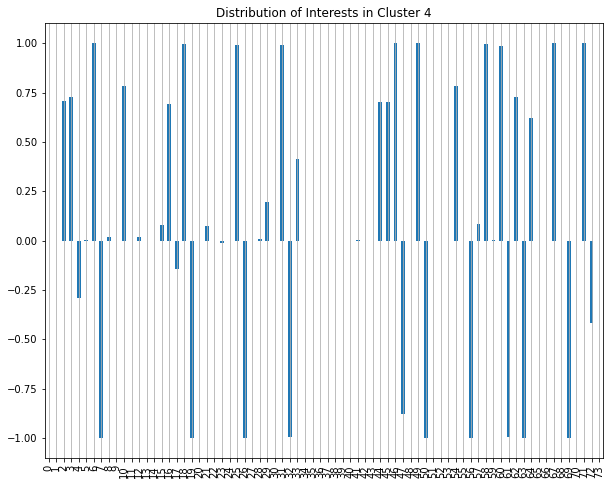

In [27]:
#Plotting the distributions in clusters
for i in range(len(dev_from_median.index)):
    plt.figure(figsize=(10,8))
  
    dev_from_median.iloc[i,:].plot(kind='bar')
    plt.title("Distribution of Interests in Cluster %d"%i)
    plt.grid(axis='x')
    #plt.axhline(y=3.5,color="red", linestyle="--")
    
    plt.show()

In [28]:
real_centers_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,0.001,-0.001,0.613,0.668,0.630,-0.001,0.998,0.000,0.000,0.000,...,-0.000,0.670,0.000,0.000,0.999,0.999,-0.000,-0.000,0.999,0.620
1,-0.000,0.887,-0.004,-0.010,-0.004,0.001,0.002,0.000,-0.000,0.000,...,0.262,-0.006,0.339,0.993,0.997,0.001,0.000,0.262,0.001,0.437
2,0.002,-0.002,-0.023,0.672,-0.023,0.259,0.899,0.003,0.000,0.002,...,0.001,0.459,0.001,0.002,0.907,0.903,0.001,0.001,0.910,0.534
3,-0.007,-0.001,0.618,0.670,0.657,0.004,0.999,0.992,-0.001,0.582,...,-0.001,-0.027,0.000,0.000,1.001,0.999,0.410,-0.001,1.000,0.611
4,0.122,-0.001,0.707,0.725,0.709,0.001,0.999,-0.001,0.018,-0.001,...,-0.001,0.623,-0.000,0.000,1.000,1.000,-0.000,-0.001,0.999,0.584
